# Planejamento Futuro

## Iremos prever o número de passageiro aéreos no futuro.

### Dividiremos de forma adequada a base de dados e construiremos uma rede neural capaz de realizar previsões. 

In [16]:
#importando a base de dados e as bibliotecas para uso
import pandas as pd
import seaborn as sns
import matplotlib as mpl

#setando os parametros para os gráficos do matplotlib
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

passageiros = pd.read_csv('Passageiros.csv')

In [17]:
#visualizando a serie temporal
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

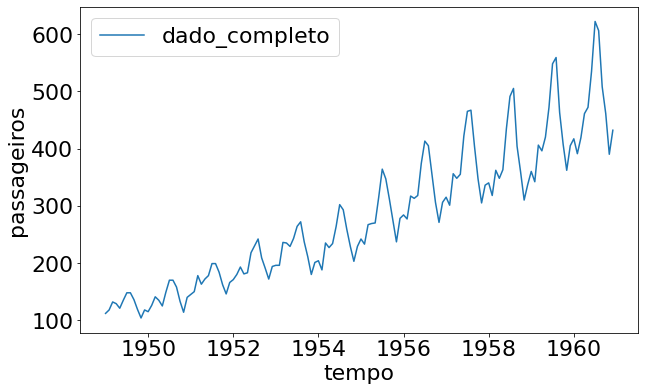

In [18]:
#plotando os dados de serie temporal
sns.lineplot(x='tempo', y='passageiros', data=passageiros,label='dado_completo')

In [19]:
#precisamos escalar os dados, converter os dados proximos a 0 para um melhor intendimento e processamento da rede neural
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [20]:
#ajustando os dados para o StandardScaler entender como os dados estão expostos
sc.fit(passageiros)

StandardScaler()

In [21]:
#dados escalados
dado_escalado = sc.transform(passageiros)

In [22]:
#passando para as variáveis x e y os dados da primeira e segunda coluna transformados.
x = dado_escalado[:,0]
y = dado_escalado[:,1]

<AxesSubplot:>

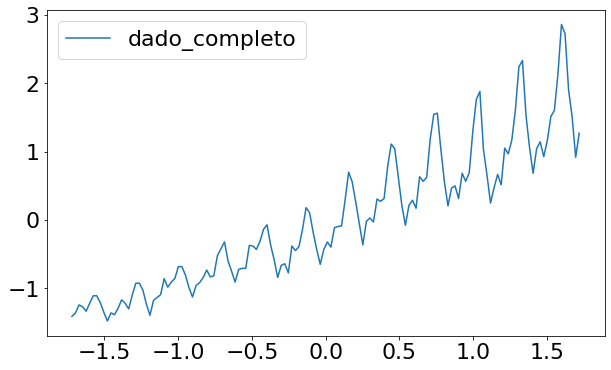

In [24]:
#plotando os dados transformados.
sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')

Text(0.5, 0, 'Tempo')

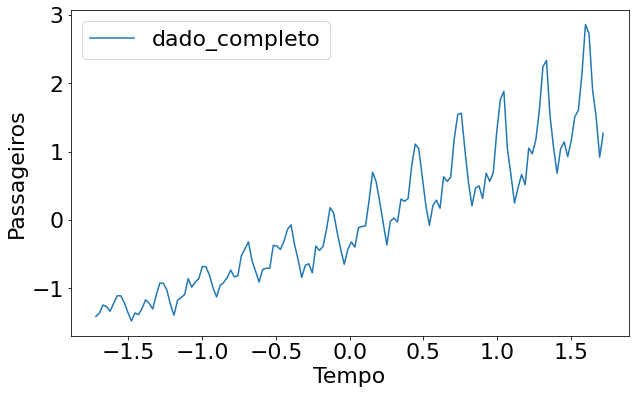

In [25]:
#adicionando legendas no gráfico
import matplotlib.pyplot as plt

sns.lineplot(x=x, y=y, data=passageiros,label='dado_completo')
plt.ylabel('Passageiros')
plt.xlabel('Tempo')

In [27]:
#dividindo os dados em treino e teste

#setando 90% dos dados para treino e 10% para teste
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros)-tamanho_treino

In [31]:
#dividindo o dados para variáveis x e y treino

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [32]:
#dividindo o dados para variáveis x e y teste
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Tempo')

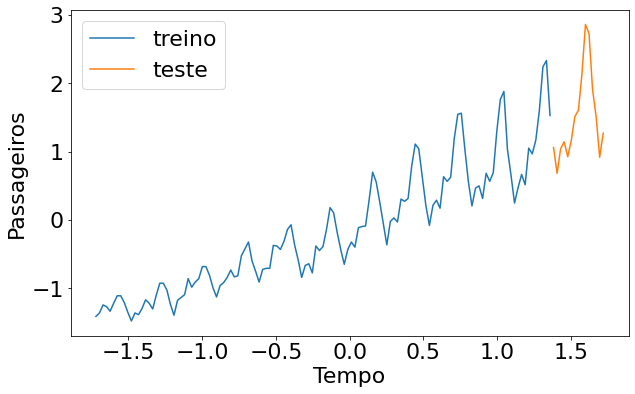

In [37]:
#plotando os dados de treino
sns.lineplot(x=xtreino, y=ytreino,label='treino')
#plotando os dados de teste
sns.lineplot(x=xteste, y=yteste,label='teste')

plt.ylabel('Passageiros')
plt.xlabel('Tempo')

<AxesSubplot:>

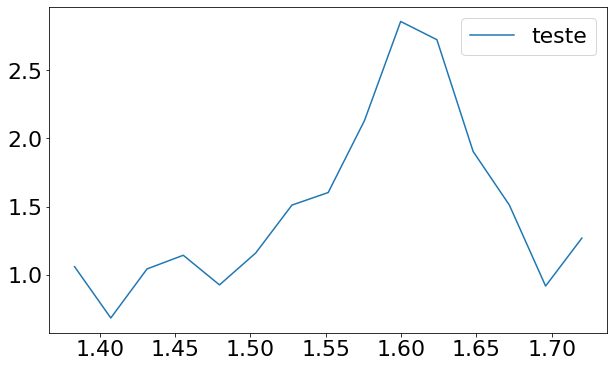